<a href="https://colab.research.google.com/github/Shiwei-Chen/DESC-624/blob/master/DESC_624_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Difference between object-oriented programing and function based programing. 

Functional Programming is the technique of programming that stress on an evaluation of functions and developing the structure and elements of computer programs. Functional programming does not work on executing commands or statements rather it evaluates expressions. Functional Programming provides great support to structured programming. 

Object-oriented programming is a programming technique based on the creation of objects. The objects are the instances of classes, which are having data regarding fields, functions, and methods. In Object-oriented programming, Objects are referred to as first-class citizens.

2. Compare Python and R in predictive analytics 

Python can pretty much do the same tasks as R. Python codes are easier to maintain and more robust than R. R has now one of the richest ecosystems to perform data analysis. It is possible to find a library for whatever the analysis you want to perform. The rich variety of library makes R the first choice for statistical analysis, especially for specialized analytical work.

3. Define dictioary in python

A dictionary is a list used to map or associate things you want to store the keys you need to get them.

4. T-test

A t-test is a type of inferential statistic used to determine if there is a significant difference between the means of two groups, which may be related in certain features.

# **Data Preparation**

In [0]:
import pandas as pd
url = 'https://raw.githubusercontent.com/ArashVafa/DESC624/master/adult_ch3_training'
adult = pd.read_csv(url)
adult.head(10)

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K
5,40,Private,11,Married-civ-spouse,Craft-repair,Male,0,0,>50K
6,38,Private,7,Married-civ-spouse,Sales,Male,0,0,<=50K
7,43,Private,7,Married-civ-spouse,Transport-moving,Male,0,2042,<=50K
8,54,?,10,Married-civ-spouse,?,Male,0,0,>50K
9,39,Private,9,Divorced,Exec-managerial,Male,0,0,<=50K


**Add a record index field to the data set**

In [0]:
adult.shape

(14797, 9)

In [0]:
adult['index'] = pd.Series(range(0,14797))
adult.head(10)

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income,index
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K,0
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K,1
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K,2
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K,3
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K,4
5,40,Private,11,Married-civ-spouse,Craft-repair,Male,0,0,>50K,5
6,38,Private,7,Married-civ-spouse,Sales,Male,0,0,<=50K,6
7,43,Private,7,Married-civ-spouse,Transport-moving,Male,0,2042,<=50K,7
8,54,?,10,Married-civ-spouse,?,Male,0,0,>50K,8
9,39,Private,9,Divorced,Exec-managerial,Male,0,0,<=50K,9


**Determine whether any outliers exist for the education field**

In [0]:
from scipy import stats
adult['edu_z'] = stats.zscore(adult['education'])
adult.head()

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income,index,edu_z
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K,0,1.128163
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K,1,-0.411359
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K,2,-1.950881
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K,3,-0.411359
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K,4,1.513043


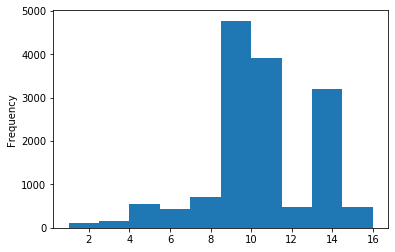

In [0]:
adult['education'].plot(kind = 'hist')

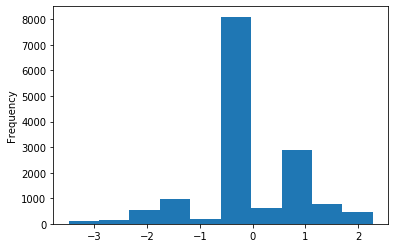

In [0]:
adult['edu_z'].plot(kind = 'hist')

In [0]:
adult_eduoutliers = adult.query('edu_z > 3' or 'edu_z < -3')
adult_eduoutliers[['edu_z']].head(n=15)

,edu_z


There is no outlier.

**Standardize the variables**

In [0]:
adult['age_z'] = stats.zscore(adult['age'])
adult.head()

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income,index,edu_z,age_z
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K,0,1.128163,0.827038
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K,1,-0.411359,-0.050257
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K,2,-1.950881,0.753930
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K,3,-0.411359,0.973254
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K,4,1.513043,-0.562012


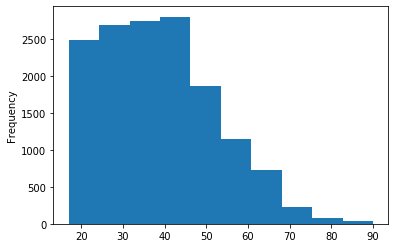

In [0]:
adult['age'].plot(kind = 'hist')

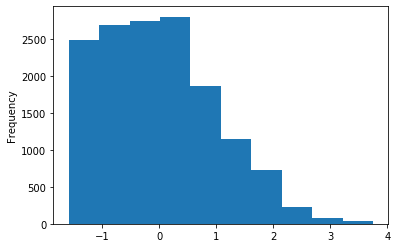

In [0]:
adult['age_z'].plot(kind = 'hist')

In [0]:
adult_ageoutliers = adult.query('age_z > 3' or 'age_z < -3')
adult_ageoutliers[['age_z']].count()

age_z    60
dtype: int64

In [0]:
adult_sort = adult_ageoutliers.sort_values(['age_z'], ascending = False)
adult_sort[['age', 'age_z']].head(n=1)

,age,age_z
99,90,3.751354


There are 60 outliers, and the most extreme outlier is age 90 with a z-score of 3.751354

**Derive a flag for capital‐gain, called capital‐gain‐flag, which equals 0 for capital gain equals zero, and 1 otherwise**

In [0]:
import numpy as np
np.unique(adult['capital-gain'])

array([    0,   114,   594,   914,   991,  1055,  1086,  1111,  1151,
        1173,  1409,  1471,  1506,  1639,  1797,  1831,  1848,  2009,
        2036,  2050,  2105,  2174,  2176,  2202,  2228,  2290,  2329,
        2346,  2354,  2387,  2407,  2414,  2463,  2580,  2597,  2635,
        2653,  2829,  2885,  2907,  2961,  2964,  2977,  2993,  3103,
        3137,  3325,  3411,  3418,  3432,  3456,  3464,  3471,  3674,
        3781,  3818,  3887,  3908,  3942,  4064,  4101,  4386,  4416,
        4508,  4650,  4687,  4787,  4865,  4931,  4934,  5013,  5060,
        5178,  5455,  5556,  6097,  6360,  6418,  6497,  6723,  6767,
        6849,  7298,  7430,  7443,  7688,  7896,  7978,  8614,  9386,
        9562, 10520, 10566, 10605, 11678, 13550, 14084, 14344, 15020,
       15024, 15831, 18481, 20051, 22040, 25124, 25236, 27828, 34095,
       41310, 99999])

In [0]:
adult['capital‐gain‐flag'] = np.where(adult['capital-gain']>0, '1', '0')
adult.head()

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income,index,edu_z,age_z,capital‐gain‐flag
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K,0,1.128163,0.827038,0
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K,1,-0.411359,-0.050257,0
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K,2,-1.950881,0.753930,0
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K,3,-0.411359,0.973254,0
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K,4,1.513043,-0.562012,1


Age anomaly? Select only records with age at least 80. Construct a histogram of age. Explain what you see in one sentence and why it is like that in another sentence

In [0]:
adult_over80 = adult.query('age >=80')
adult_over80

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income,index,edu_z,age_z,capital‐gain‐flag
99,90,Private,9,Never-married,Other-service,Male,0,2206,<=50K,99,-0.411359,3.751354,0
204,80,?,9,Widowed,?,Male,0,0,<=50K,204,-0.411359,3.020275,0
492,90,Private,9,Never-married,Other-service,Female,0,0,<=50K,492,-0.411359,3.751354,0
552,88,Self-emp-not-inc,15,Married-civ-spouse,Prof-specialty,Male,0,0,<=50K,552,1.897924,3.605138,0
885,90,Private,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K,885,1.128163,3.751354,0
1066,90,Private,10,Never-married,Other-service,Male,0,0,<=50K,1066,-0.026479,3.751354,0
1485,82,?,4,Widowed,?,Male,0,0,<=50K,1485,-2.335762,3.166491,0
2420,90,Private,5,Never-married,Adm-clerical,Female,0,0,<=50K,2420,-1.950881,3.751354,0
2430,80,Private,14,Widowed,Prof-specialty,Female,0,0,<=50K,2430,1.513043,3.020275,0
2467,90,Local-gov,14,Married-civ-spouse,Exec-managerial,Male,20051,0,>50K,2467,1.513043,3.751354,1


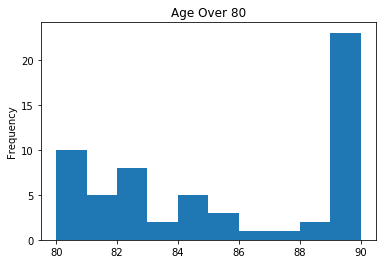

In [0]:
adult_over80['age'].plot(kind = 'hist', title = 'Age Over 80')

There are so many 90s. The reason could be when the survey is given out, the upper limit of age is 90.

# **Exploratory Data Analytics**

In [0]:
import pandas as pd
url = 'https://raw.githubusercontent.com/ArashVafa/DESC624/master/bank_marketing_training'
bank = pd.read_csv(url)
bank.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,days_since_previous,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,25,services,single,high.school,no,yes,no,telephone,may,mon,222,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,137,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
5,57,housemaid,divorced,basic.4y,no,yes,no,telephone,may,mon,293,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
6,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,312,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
7,39,management,single,basic.9y,unknown,no,no,telephone,may,mon,195,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
8,30,unemployed,married,high.school,no,no,no,telephone,may,mon,38,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
9,55,retired,single,high.school,no,yes,no,telephone,may,mon,342,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


**Produce the following graphs. What is the strength of each graph? Weakness?**

a. Bar graph of marital.

b. Bar graph of marital, with overlay of response.

c. Normalized bar graph of marital, with overlay of response 

In [0]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

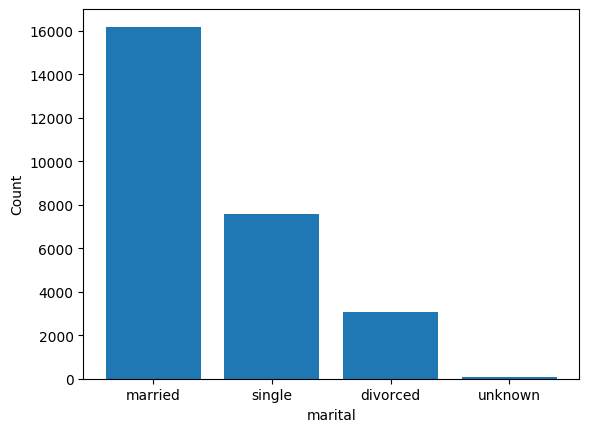

In [0]:
fig, ax = plt.subplots()  
x = bank['marital'].unique()
y = bank['marital'].value_counts()
ax.bar(x, y)  
ax.set_xlabel('marital')  
ax.set_ylabel('Count')  
plt.show()

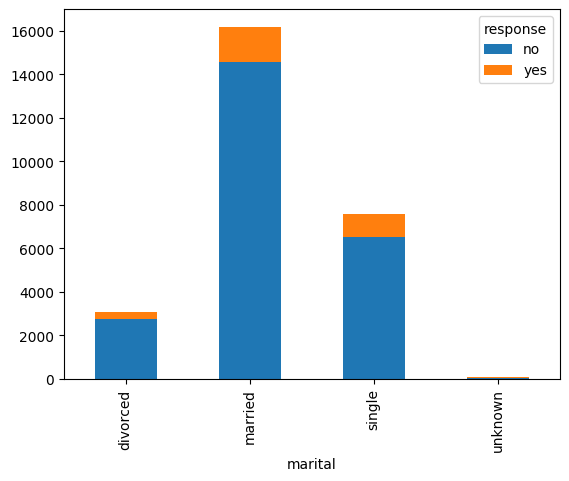

In [0]:
crosstab1 = pd.crosstab( bank['marital'], bank['response'])
crosstab1.plot(kind = 'bar', stacked = True)

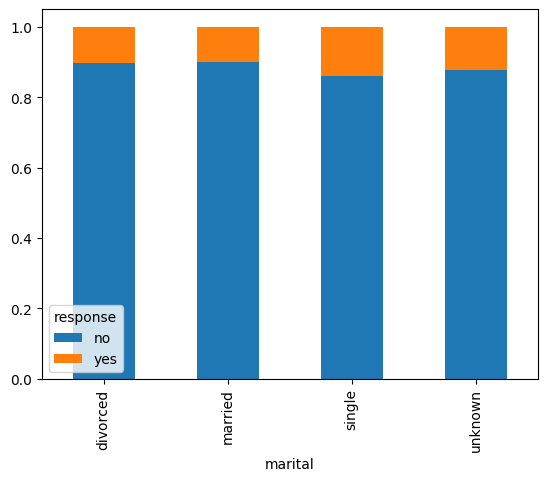

In [0]:
crosstab1norm = crosstab1.div(crosstab1.sum(1), axis = 0)
crosstab1norm.plot(kind = 'bar', stacked = True)

The normalized graph shows the proportion of the response more clearly. However, normalized one cannot tell the total number of the respinse, which can be shown in the overlay graph.

**Using the graph from the previous Exercise, describe the relationship between marital and response**

There is no such association between maritial status and responses.

**Do the following with the variables marital and response**

a. Build a contingency table, being careful to have the correct variables representing the rows and columns. Report the counts and the column percentages.

b. Describe what the contingency table is telling you.

In [0]:
crosstab1.div(crosstab1.sum(0), axis = 1)

response,no,yes
marital,,
divorced,0.114837,0.104418
married,0.610358,0.538153
single,0.272712,0.355087
unknown,0.002093,0.002343


The table basically tell the marital status proportion of each response. Since married people have the most count, they count highesr percentage in both response column. Thus, it is kind of meaningless ot look at this.

**Repeat the previous exercise, this time reporting the row percentages. Explain the difference between the interpretation of this table and the previous contingency table**

In [0]:
crosstab2 = pd.crosstab( bank['response'], bank['marital'])
crosstab2.div(crosstab2.sum(0), axis = 1)

marital,divorced,married,single,unknown
response,,,,
no,0.897872,0.900661,0.859934,0.877193
yes,0.102128,0.099339,0.140066,0.122807


This table tell the response proportion of each marital status. 

**Produce the following graphs. What is the strength of each graph? Weakness?**

a. Histogram of duration.

b. Histogram of duration, with overlay of response.

c. Normalized histogram of duration, with overlay of response.

In [0]:
np.unique(bank['duration'])

array([   0,    1,    2, ..., 3785, 4199, 4918])

Text(0, 0.5, 'Count')

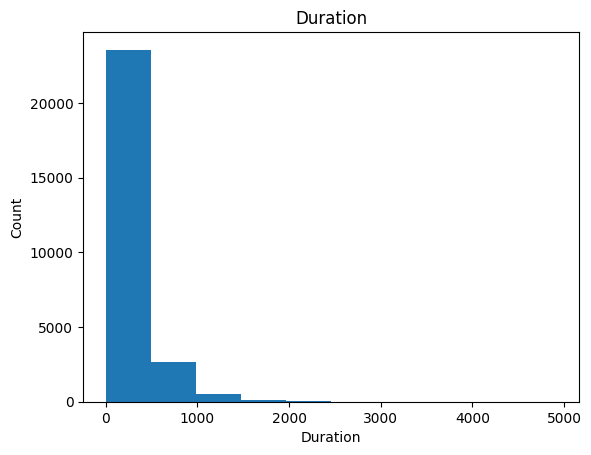

In [0]:
plt.hist(bank['duration'])
plt.title('Duration')
plt.xlabel('Duration')
plt.ylabel('Count')

In [0]:
from scipy import stats
bank['dur_z'] = stats.zscore(bank['duration'])
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,days_since_previous,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,dur_z
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,0.012581
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,-0.419898
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,-0.157321
3,25,services,single,high.school,no,yes,no,telephone,may,mon,222,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,-0.138014
4,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,137,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,-0.466235


In [0]:
bankduroutliers = bank.query('dur_z > 3' or 'dur_z < -3')
bankduroutliers[['duration','dur_z']].head(n=15)

,duration,dur_z
18,1666,5.437871
42,1575,5.086482
48,1042,3.028347
51,1467,4.669449
98,2033,6.855011
121,1077,3.163497
277,1623,5.271830
285,1677,5.480347
340,1297,4.013008
364,1906,6.364611


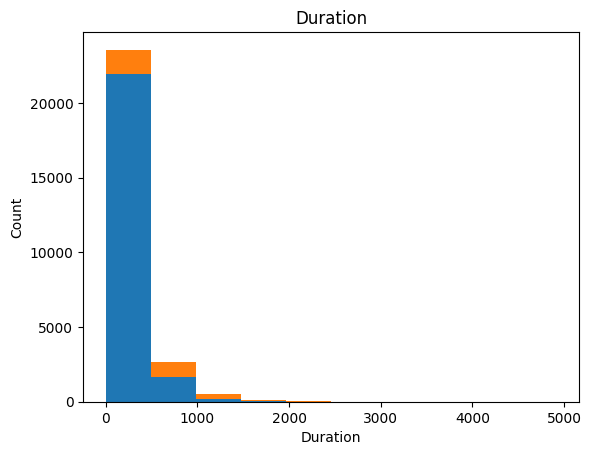

In [0]:
bankduryes = bank[bank.response =='yes']['duration']
bankdurno = bank[bank.response =='no']['duration']
plt.hist([bankdurno,bankduryes], bins = 10, stacked = True)
plt.title('Duration')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.show()

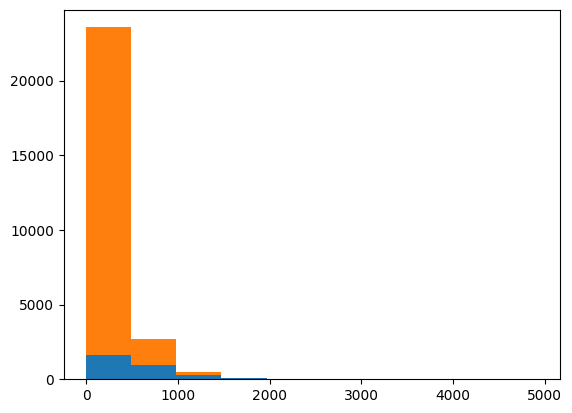

In [0]:
(n, bins, patches) = plt.hist([bankduryes, bankdurno], bins = 10, stacked = True)
n_table = np.column_stack((n[0], n[1]))
n_norm = n_table / n_table.sum(axis = 1)[:, None]
ourbins = np.column_stack((bins[0:10], bins[1:11]))

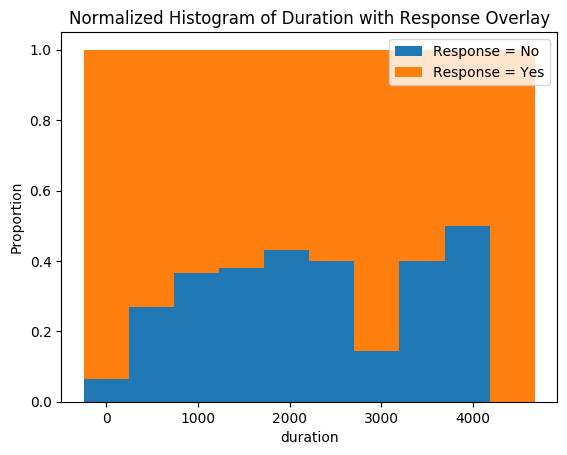

In [0]:
p1 = plt.bar(x = ourbins[:,0], height = n_norm[:,0], width = ourbins[:,1]-ourbins[:,0])
p2 = plt.bar(x = ourbins[:,0], height = n_norm[:,1], width = ourbins[:,1]-ourbins[:,0], bottom = n_norm[:,0])
plt.legend(['Response = No', 'Response = Yes'])
plt.title('Normalized Histogram of Duration with Response Overlay')
plt.xlabel('duration'); plt.ylabel('Proportion')
plt.show()

**Using the graph from the previous Exercise, describe the relationship between duration and response**

With most answers where duaration locate under 2000, the 'no' response is gradually increasing

**Examine the non‐normalized and normalized histograms of duration, with overlay of response. Identify cutoff point(s) for duration, which separate low values of response from high values. Define a new categorical variable, duration_binned, using the cutoff points you identified**

Under 500, 500 to 1000, over 1000

**Provide the following. Describe each of the results**

a. Contingency table of duration_binned with response, with counts and column
percentages.

b. Non‐normalized bar graph of duration_binned, with response overlay.

c. Normalized bar graph of duration_binned, with response overlay.

In [0]:
bank['duration_binned'] = pd.cut(x = bank['duration'], bins = [0,500, 1000, 6000], labels = ['Under 500', '500 to 1000', 'over 1000'],right = False)
crosstab3 = pd.crosstab(bank['duration_binned'], bank['response'])
crosstab3.div(crosstab3.sum(0), axis = 1)

response,no,yes
duration_binned,,
Under 500,0.921251,0.552209
500 to 1000,0.068366,0.328313
over 1000,0.010383,0.119478


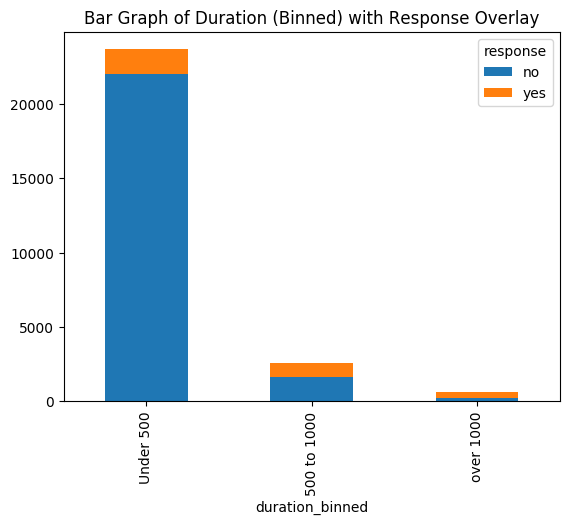

In [0]:
crosstab3.plot(kind='bar', stacked = True, title = 'Bar Graph of Duration (Binned) with Response Overlay')

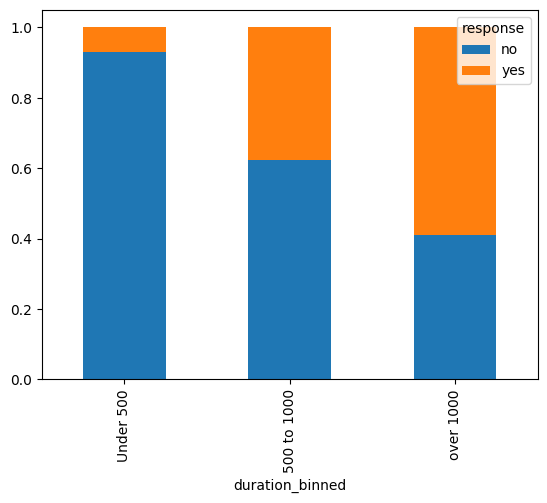

In [0]:
crosstab3norm = crosstab3.div(crosstab3.sum(1), axis = 0)
crosstab3norm.plot(kind = 'bar', stacked = True)

**Construct a contingency table of job with response, with counts and column percentages**

In [0]:
crosstab4 = pd.crosstab(bank['job'], bank['response'])
crosstab4.div(crosstab4.sum(0), axis = 1)

response,no,yes
job,,
admin.,0.247132,0.285810
blue-collar,0.235745,0.140562
entrepreneur,0.035251,0.024096
housemaid,0.026752,0.023427
management,0.070334,0.069946
retired,0.035669,0.097390
self-employed,0.034539,0.031124
services,0.099640,0.067269
student,0.016914,0.064926
